# Classification Task

In this assignment, you will:

1. Propose a custom classification task and create a corpus of documents that are annotated for this task.

2. Propose discriminative features to be included in the feature vector representation for the examples in this task and evaluate their utility by training and testing Logistic Regression models.

## Write Your Name Here: Nalini Katiyar
## Student ID: 801204572

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX and download a PDF version *.pdf* showing the code and the output of all cells, and save it in the same folder that contains the notebook file *.ipynb*.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing we will see when grading!
7. Submit **both** your PDF and notebook on Canvas.
8. Verify your Canvas submission contains the correct files by downloading them after posting them on Canvas.

## Corpus acquisition and formatting

1. Create a corpus of documents that you can use to create at least 300 examples for a task that is of interest you, a task that can be modeled as classification. In class we discussed the following NLP tasks:

    - Document classification.
    - Named entity recognition.
    - Relation extraction.

However you can choose any text processing task as long as it can be solved using classification.
    
- Manually annotate your data, such that you have at least 300 classification examples.
- For manual annotation, you can use one of the schemes or annotation tools discussed in class.
- The more data in your collection, the better your classification models will tend to perform on it.
    

2. Partition your data into three datasets: *train*, *dev*, and *test*, with the training set containing 80% of the documents, development 10%, and test 10%.

    
3. Your choice of task, documents, and labels is completely up to you. For example, if you choose to work on document classification, some possible sources of data are:

    - **Project Gutenberg**: Metadata is available at this <a href="https://github.com/hugovk/gutenberg-metadata">Github repo</a> along with URLs for the texts. Labels here can be author, subject, genre, etc.
	- **News articles**: Crawl news articles from different domains (e.g,. CNN, FoxNews); the label for each article is the domain.
	- **Movie summaries**: Labels here can be any categorical metadata aspect (genre, release date); note real-valued metadata (like box office, runtime) can be discretized by selecting some reasonable thresholds.
	- **Tweets**: Download your own tweets. Labels here can be any categorical metadata included in the tweet, or labels you add by hand (e.g., sarcasm).
    
    
5. Additional requirements:

    - No sentiment classification.
    - **Undergraduate students**: It is acceptable to use an existing dataset, e.g. from kaggle.com or other repositories. However, it is preferable that you create your own dataset.
    - **Graduate students**: It is highly recommended that you create your own dataset. This can also serve as the basis for your project, if you choose to submit a project instead of taking the final exam.

### Task and Dataset description

Describe your data. What is the source of the documents, and what do the labels mean?

# YOUR CONTRIBUTION HERE






### Dataset reading and statistics


Read the documents in each of the 3 datasets (*training*, *development*, and *test*) and for each dataset display the following statistics:

1. The total number of examples in the dataset.
2. The distribution of labels, which is task dependent. For example:
    - For document classification, this would be the number of documents for each label.
    - For NE recognition, this would be the number of names found for each NE type.
    - For RE, this would be the total number of NE pairs in a sentence that are in the relationship (positive) or not (negative).

For document classification, you can reuse the dataset reading code from the sentiment analysis assignments. For a different classification task, you would have to write different functions to read the data and the annotations. For example, if you use the Brat annotation tool, the annotations are stored in the `.ann` text files, which are straightforward to read.

In [38]:
def read_examples(filename):
    X = []
    Y = []
    with open(filename, mode = 'r', encoding="utf-8") as file:
        for line in file:
            [label, text] = line.rstrip().split(' ', maxsplit = 1)
            X.append(text)
            Y.append(label)
    return X, Y

def count_lable(data):
    data_lables = {}
    for ele in data:
        if ele in data_lables:
            data_lables[ele] += 1
        else:
            data_lables[ele] = 1
    return(data_lables)

datapath = "../data/data1_"

train = datapath+'train.txt'
trainX,trainY = read_examples(train)
print("Document in Training Dataset :",count_lable(trainY))

dev = datapath+'dev.txt'
devX,devY = read_examples(dev)
print("Document in Development Dataset :",count_lable(devY))

test = datapath+'test.txt'
testX,testY = read_examples(test)
print("Document in Testing Dataset :",count_lable(testY))



Document in Training Dataset : {'romance': 528, 'action': 528}
Document in Development Dataset : {'romance': 66, 'action': 66}
Document in Testing Dataset : {'romance': 66, 'action': 66}


In [39]:
romance_lexicon = set(('love','relationship','boyfriend','girlfriend','romance','romantic','romanticists','soulmate','bride','ex','drama','breakup','fiancé','pregnant','wife','sensual','charming','engagement','wedding','husband','date','heart','dil','pyaar','lover','affair','sex','bachelor''breakup','prince','princess','falls'))
action_lexicon = set(('hitman','military','rescue','crime','racing','forces','adventure','war','action','fight','mission','undercover','agent','terrorist','escape','law','gun','fire','conspiracy','sniper','kill','hunter','murder','deadly','kidnap','thriller','spy','attack','drug','cartel'))



### From textual examples to feature vectors

Read the documents in each dataset (train, dev, test) and generate the corresponding examples as feature vectors. Some skeleton code is provided below, but feel free to customize as you see fit for your task.

1. Tokenize each document using a spaCy tokenizer.

2. Create at least two feature functions, and include them in the *features* list.

    - A passing grade will be given to generic features that apply across arbitrary text classification problems (e.g., a feature for bigrams);

    - A better grade will be given for features that reveal your own understanding of your data. What features do you think will help for your particular problem? Would features based on higher level NLP processing tasks (syntactic parsing, coreference resolution) be useful? Your grade is not tied to whether accuracy goes up or down, so be creative!

    - You are free to read in any other external resources you like (dictionaries, document metadata, etc.), but make sure you include them in the `../data` folder.

3. Process each dataset into a set of examples, by mapping each document in the dataset to its corresponding set of examples. Process each example into a feature vector, using the feature functions from *features*. You can reuse feature vector representation code from previous assignments.
    - map example to a dictionary of feature names.
    - map feature names to unique feature IDs.
    - each example is a feature vector, where each feature ID is mapped to a feature value (e.g. word occurences).

In [40]:
import spacy
from spacy.lang.en import English
from scipy import sparse
from sklearn.linear_model import LogisticRegression

# Create spaCy tokenizer.
spacy_nlp = English()

def spacy_tokenizer(text):
    tokens = spacy_nlp.tokenizer(text)
    
    return [token.text for token in tokens]

In [41]:
def word_features(tokens):
    feats = {}
    for word in tokens:
        feat = 'WORD_%s' % word
        if feat in feats:
            feats[feat] +=1
        else:
            feats[feat] = 1
    return feats

In [42]:
def lexicon_features(tokens):
    feats = {}
    for token in tokens:
        poselx_word = 'ROMLEX'+ token
        neglex_word = 'ACTLEX'+ token
        if(poselx_word in feats):
            feats[poselx_word]+=1
        elif(neglex_word in feats):
            feats[neglex_word]+=1
        elif(poselx_word not in feats and token in romance_lexicon):
            feats[poselx_word] = 1
        elif(neglex_word not in feats and token in action_lexicon):
            feats[neglex_word] = 1
    
    return feats

In [43]:
def count_lexicon(tokens):
    feats = {'ROMLEX': 0, 'ACTLEX': 0}
    # YOUR CODE HERE
    for token in tokens:
        if(token in romance_lexicon):
            feats['ROMLEX']+=1
        elif(token in action_lexicon):
            feats['ACTLEX']+=1
            
    return feats

In [44]:
def add_features(feats, new_feats):
    for feat in new_feats:
        if feat in feats:
            feats[feat] += new_feats[feat]
        else:
            feats[feat] = new_feats[feat]
    return feats

In [45]:
def create_examples(trainX, feature_functions, tokenizer):
    examples = []
    count = 0
    for doc in trainX:
        feats = {}
        tokens = tokenizer(doc)
        for func in feature_functions:
            add_features(feats, func(tokens))

        examples.append(feats)
        count +=1
        
        if count % 100 == 0:
            print('Processed %d examples into features' % len(examples))
    
    return examples

In [46]:
def create_vocab(examples):
    feature_vocab = {}
    idx = 0
    for example in examples:
        for feat in example:
            if feat not in feature_vocab:
                feature_vocab[feat] = idx
                idx += 1
                
    return feature_vocab

In [47]:
def features_to_ids(examples, feature_vocab):
    new_examples = sparse.lil_matrix((len(examples), len(feature_vocab)))
    for idx, example in enumerate(examples):
        for feat in example:
            if feat in feature_vocab:
                new_examples[idx, feature_vocab[feat]] = example[feat]
                
    return new_examples

### Train and evaluate

Write a `train_and_test` function that takes as input the training and test examples, trains a Logistic Regression model on the training examples and evaluates it on the test examples. You can use the default value for the `C` hyper-parameter, or tune it on the development examples. Report accuracy, or precision and recall, depending on the task.

In [48]:
def train_and_test(trainX, trainY, devX, devY, feature_functions, tokenizer):
    # Pre-process training documents. 
    trainX_feat = create_examples(trainX, feature_functions, tokenizer)

    # Create vocabulary from features in training examples.
    feature_vocab = create_vocab(trainX_feat)
    print('Vocabulary size: %d' % len(feature_vocab))

    trainX_ids = features_to_ids(trainX_feat, feature_vocab)
    
    # Train LR model.
    lr_model = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'lbfgs', max_iter = 1000)
    lr_model.fit(trainX_ids, trainY)
    
    # Pre-process test documents. 
    devX_feat = create_examples(devX, feature_functions, tokenizer)
    devX_ids = features_to_ids(devX_feat, feature_vocab)

    # Test LR model.
    print('Accuracy: %.3f' % lr_model.score(devX_ids, devY))
   

In [49]:
datapath = '../data'
features = [word_features,count_lexicon]

# Evaluate LR model.
train_and_test(trainX, trainY, devX, devY, features, spacy_tokenizer)

Processed 100 examples into features
Processed 200 examples into features
Processed 300 examples into features
Processed 400 examples into features
Processed 500 examples into features
Processed 600 examples into features
Processed 700 examples into features
Processed 800 examples into features
Processed 900 examples into features
Processed 1000 examples into features
Vocabulary size: 10022
Processed 100 examples into features
Accuracy: 0.765


### Ablation experiments

Evaluate the impact of your features by training and testing with vs. without each feature.

In [50]:
# Specify features to use. Do this multiple times, with and without any of the new features.
features = [word_features,count_lexicon]

# Create training, development, and test examples
# datapath = "../data/data_"

# train = datapath+'train.txt'
# trainX,trainY = read_examples(train)
# print("Document in Training Dataset :",count_lable(trainY))

# dev = datapath+'dev.txt'
# devX,devY = read_examples(dev)
# print("Document in Development Dataset :",count_lable(devY))

# test = datapath+'test.txt'
# testX,testY = read_examples(test)
# print("Document in Testing Dataset :",count_lable(testY))

# Evaluate LR model.
train_and_test(trainX, trainY, testX, testY, features, spacy_tokenizer)

Processed 100 examples into features
Processed 200 examples into features
Processed 300 examples into features
Processed 400 examples into features
Processed 500 examples into features
Processed 600 examples into features
Processed 700 examples into features
Processed 800 examples into features
Processed 900 examples into features
Processed 1000 examples into features
Vocabulary size: 10022
Processed 100 examples into features
Accuracy: 0.803


## Plot ROC or PR Curve

*Mandatory for graduate students, optional for undergraduate students.*

Take your best classifier and plot a <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic">Receiver Operating Characteristic (ROC)</a> curve if you use accuracy for evaluation, by varying a threshold on the probabilistic output. You can use the <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html">sklearn implementation</a>, or implement your own. If you use precision and recall, plot a precision vs. recall (PR) curve instead.

Processed 100 examples into features
Processed 200 examples into features
Processed 300 examples into features
Processed 400 examples into features
Processed 500 examples into features
Processed 600 examples into features
Processed 700 examples into features
Processed 800 examples into features
Processed 900 examples into features
Processed 1000 examples into features
Vocabulary size: 10022
Processed 100 examples into features
Accuracy: 0.803


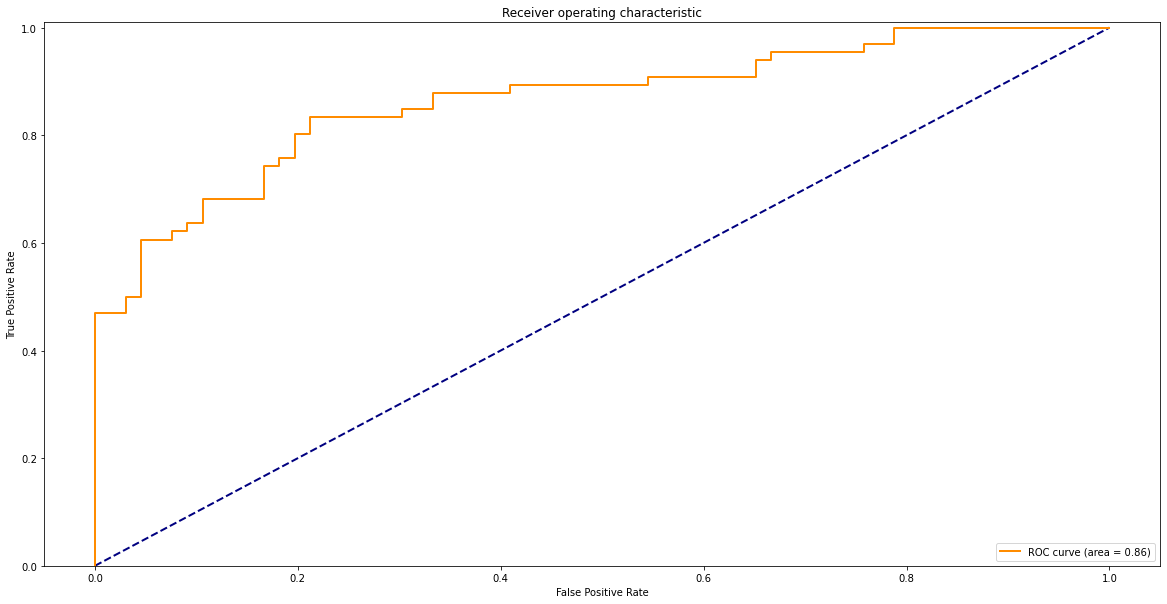

In [58]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

feature_functions = [word_features,count_lexicon]

trainX_feat = create_examples(trainX, feature_functions, spacy_tokenizer)
feature_vocab = create_vocab(trainX_feat)
print('Vocabulary size: %d' % len(feature_vocab))

trainX_ids = features_to_ids(trainX_feat, feature_vocab)
lr_model = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'lbfgs', max_iter = 1000)
lr_model.fit(trainX_ids, trainY)
testX_feat = create_examples(testX, feature_functions, spacy_tokenizer)
testX_ids = features_to_ids(testX_feat, feature_vocab)

print('Accuracy: %.3f' % lr_model.score(testX_ids, devY))

lr_probability = lr_model.predict_proba(testX_ids)[:,1]
testY_class = []
for item in testY:
    if(item == 'action'):
        testY_class.append(0)
    else:
        testY_class.append(1)
fpr, tpr, _ = roc_curve(testY_class,  lr_probability)
roc_auc = roc_auc_score(testY_class, lr_probability)
lw = 2
plt.figure(figsize=(20,10))
plt.ylim(0,1.01)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.plot(fpr,tpr,color="darkorange",lw=lw, label="ROC curve (area = %0.2f)" % roc_auc,)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

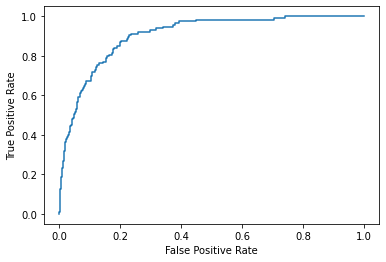

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Bonus points ##

Anything extra goes here.


In [51]:
import nltk
from nltk.stem import SnowballStemmer
stemmer = nltk.stem.SnowballStemmer('english')

def lemma_feature(tokens):
    lemma_token = []
    lemma_feat = {}
    for token in tokens:
        lemma_token.append(stemmer.stem(token)+'_'+token)
    for x in lemma_token:
        if('_' in x):
            temp = x.split('_')
            if(x not in  lemma_feat):
                lemma_feat[x] = 1
            elif(x in  lemma_feat):
                lemma_feat[x] += 1
    return lemma_feat

datapath = '../data'
features = [lemma_feature,count_lexicon]

# Evaluate LR model.
train_and_test(trainX, trainY, devX, devY, features, spacy_tokenizer)


Processed 100 examples into features
Processed 200 examples into features
Processed 300 examples into features
Processed 400 examples into features
Processed 500 examples into features
Processed 600 examples into features
Processed 700 examples into features
Processed 800 examples into features
Processed 900 examples into features
Processed 1000 examples into features
Vocabulary size: 10022
Processed 100 examples into features
Accuracy: 0.765


In [52]:
accronyms = set(('FBI','CIA','DEA','NYPD','AD','UFO','BC','feds','RAW','FIR','USSR','SP','NATO','DEA','II','III','sci-fi','WWII','NY','rom-com'))

def count_acronyms(tokens):
    feat_accr = {'accronym': 0}
    for token in tokens:
        if token in accronyms:
            feat_accr['accronym'] += 1

    return feat_accr

features = [lemma_feature,count_lexicon,count_acronyms]

# Evaluate LR model.
train_and_test(trainX, trainY, devX, devY, features, spacy_tokenizer)
train_and_test(trainX, trainY, testX, testY, features, spacy_tokenizer)


Processed 100 examples into features
Processed 200 examples into features
Processed 300 examples into features
Processed 400 examples into features
Processed 500 examples into features
Processed 600 examples into features
Processed 700 examples into features
Processed 800 examples into features
Processed 900 examples into features
Processed 1000 examples into features
Vocabulary size: 10023
Processed 100 examples into features
Accuracy: 0.765
Processed 100 examples into features
Processed 200 examples into features
Processed 300 examples into features
Processed 400 examples into features
Processed 500 examples into features
Processed 600 examples into features
Processed 700 examples into features
Processed 800 examples into features
Processed 900 examples into features
Processed 1000 examples into features
Vocabulary size: 10023
Processed 100 examples into features
Accuracy: 0.811


In [55]:
import nltk
from nltk.stem import SnowballStemmer
stemmer = nltk.stem.SnowballStemmer('english')


place = ['us', 'france', 'europe', 'texas', 'new york', 'ny', 'india', 'norway', 'china', 'russia', 'canada', 'mexico', 'japan', 'brazil', 'germany', 'australia', 'spain', 'italy', 'argentina', 'sweden', 'south africa', 'egypt', 'portugal', 'iran', 'greece', 'turkey', 'finland', 'poland', 'chile', 'iraq', 'pakistan', 'indonesia', 'north korea', 'denmark', 'switzerland', 'saudi arabia', 'thailand', 'netherlands', 'austria', 'belgium', 'iceland', 'peru', 'colombia', 'cuba', 'ukraine', 'afghanistan', 'morocco', 'mongolia', 'uruguay', 'madagascar', 'london', 'italy', 'hong kong', 'california', 'barcelona', 'paris', 'america', 'georgia', 'turkey', 'philippines', 'florida', 'brazilian', 'orleans', 'rome', 'shanghai', 'korean','indian']

def count_places(tokens):
    feat_accr = {'place': 0}
    for token in tokens:
        token = stemmer.stem(token)
        if token.lower() in accronyms:
            feat_accr['place'] += 1

    return feat_accr

features = [lemma_feature,count_lexicon,count_places]

# Evaluate LR model.
train_and_test(trainX, trainY, devX, devY, features, spacy_tokenizer)
train_and_test(trainX, trainY, testX, testY, features, spacy_tokenizer)

Processed 100 examples into features
Processed 200 examples into features
Processed 300 examples into features
Processed 400 examples into features
Processed 500 examples into features
Processed 600 examples into features
Processed 700 examples into features
Processed 800 examples into features
Processed 900 examples into features
Processed 1000 examples into features
Vocabulary size: 10023
Processed 100 examples into features
Accuracy: 0.765
Processed 100 examples into features
Processed 200 examples into features
Processed 300 examples into features
Processed 400 examples into features
Processed 500 examples into features
Processed 600 examples into features
Processed 700 examples into features
Processed 800 examples into features
Processed 900 examples into features
Processed 1000 examples into features
Vocabulary size: 10023
Processed 100 examples into features
Accuracy: 0.803


## Analysis ##
Include an analysis of the results that you obtained in the experiments above. It is improtant that results are formatted well, e.g. using tables, lists, etc.